## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
df = pd.read_csv('/Users/navneetwarraich/Downloads/cleaned_ecommerce_dataset.csv')
display(df)
print(df.shape)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


(2685, 11)


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [40]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder(dtype=int)

df["categorycode"]=ord_enc.fit_transform(df[['category']])
df["gendercode"]=ord_enc.fit_transform(df[['gender']])
df["reviewcode"]=ord_enc.fit_transform(df[['review']])

df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city,categorycode,gendercode,reviewcode
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4,8,1,1618
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4,8,1,1125
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4,8,1,2185
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4,5,1,2243
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4,5,1,1033


In [43]:
helpfulness = df['helpfulness'].corr(df['rating'])
category = df['categorycode'].corr(df['rating'])
review = df['reviewcode'].corr(df['rating'])
gender = df['gendercode'].corr(df['rating'])

print('helpfulness corr =', helpfulness)
print('category corr =',category)
print('review corr =',review)
print('gender corr =',gender)

helpfulness corr = -0.00752333772684455
category corr = -0.16315765340915644
review corr = -0.03611838655212237
gender corr = -0.03433661424208268


In [67]:
# analysis
print('rating is more correlated with column category and review')
print('rating is less correlated with column helpfulness and gender')
print('In conclusion, due to all the values being at a smaller scale, rating is less correlated with all those 4 features. Hence providing lack of accuracy')

rating is more correlated with column category and review
rating is less correlated with column helpfulness and gender
In conclusion, due to all the values being at a smaller scale, rating is less correlated with all those 4 features. Hence providing lack of accuracy


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [45]:
from sklearn.model_selection import train_test_split
traincase1, testcase1 = train_test_split(df, test_size = 0.9, random_state = 142)
print('Case 1 train shape =', traincase1.shape)
print('Case 1 test shape=', testcase1.shape)


traincase2, testcase2 = train_test_split(df, test_size = 0.1, random_state = 142)
print('Case 2 train shape =', traincase2.shape)
print('Case 2 test shape=', testcase2.shape)

Case 1 train shape = (268, 14)
Case 1 test shape= (2417, 14)
Case 2 train shape = (2416, 14)
Case 2 test shape= (269, 14)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [52]:
# model A
from sklearn import linear_model
M1 = linear_model.LinearRegression()
X_train_M1 = traincase1[['categorycode','reviewcode']]
y_train_M1 = traincase1['rating']
X_test_M1 = testcase1[['categorycode','reviewcode']]
y_test_M1 = testcase1['rating']
M1.fit(X_train_M1,y_train_M1)


# model B
L1 = linear_model.LinearRegression()
X_train_L1 = traincase1[['helpfulness','gendercode']]
y_train_L1 = traincase1['rating']
X_test_L1 = testcase1[['helpfulness','gendercode']]
y_test_L1 = testcase1['rating']
L1.fit(X_train_L1,y_train_L1)


# model C
M2 = linear_model.LinearRegression()
X_train_M2 = traincase2[['categorycode','reviewcode']]
y_train_M2 = traincase2['rating']
X_test_M2 = testcase2[['categorycode','reviewcode']]
y_test_M2 = testcase2['rating']
M2.fit(X_train_M2,y_train_M2)


# model D
L2 = linear_model.LinearRegression()
X_train_L2 = traincase2[['helpfulness','gendercode']]
y_train_L2 = traincase2['rating']
X_test_L2 = testcase2[['helpfulness','gendercode']]
y_test_L2 = testcase2['rating']
L2.fit(X_train_L2,y_train_L2)


LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [53]:
from sklearn.metrics import mean_squared_error


In [54]:
predictedM1 = M1.predict(X_test_M1)
mseM1 = mean_squared_error(predictedM1,y_test_M1)
rmseM1 = np.sqrt(mseM1)
print("M1 MSE:", mseM1)
print("M1 RMSE:", rmseM1)

# Evaluate reg_L1
predictedL1 = L1.predict(X_test_L1)
mseL1 = mean_squared_error(predictedL1,y_test_L1)
rmseL1 = np.sqrt(mseL1)
print('-------------------------------')
print("L1 MSE:", mseL1)
print("L1 RMSE:", rmseL1)

# Evaluate reg_M2
predictedM2 = M2.predict(X_test_M2)
mseM2 = mean_squared_error(predictedM2,y_test_M2)
rmseM2 = np.sqrt(mseM2)
print('-------------------------------')
print("M2 MSE:", mseM2)
print("M2 RMSE:", rmseM2)

# Evaluate reg_L2
predictedL2 = L2.predict(X_test_L2)
mseL2 = mean_squared_error(predictedL2,y_test_L2)
rmseL2 = np.sqrt(mseL2)
print('-------------------------------')
print("L2 MSE:", mseL2)
print("L2 RMSE:", rmseL2)



M1 MSE: 1.7690740179517055
M1 RMSE: 1.3300654186737229
-------------------------------
L1 MSE: 1.8412549895856636
L1 RMSE: 1.356928513071217
-------------------------------
M2 MSE: 1.758897535980505
M2 RMSE: 1.3262343442923294
-------------------------------
L2 MSE: 1.8109460127732369
L2 RMSE: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [63]:
pd.DataFrame({'mse': [mseM1,mseL1,mseM2,mseL2]}, index=['M1','L1', 'M2', 'L2'])

,mse
M1,1.769074
L1,1.841255
M2,1.758898
L2,1.810946


In [58]:
msedf = pd.DataFrame({'mse': [mseM1,mseL1,mseM2,mseL2]}, index=['M1','L1', 'M2', 'L2'])

rmsedf = pd.DataFrame({'rmse': [rmseM1,rmseL1,mseM2,rmseL2]}, index=['M1','L1', 'M2', 'L2'])

<BarContainer object of 4 artists>

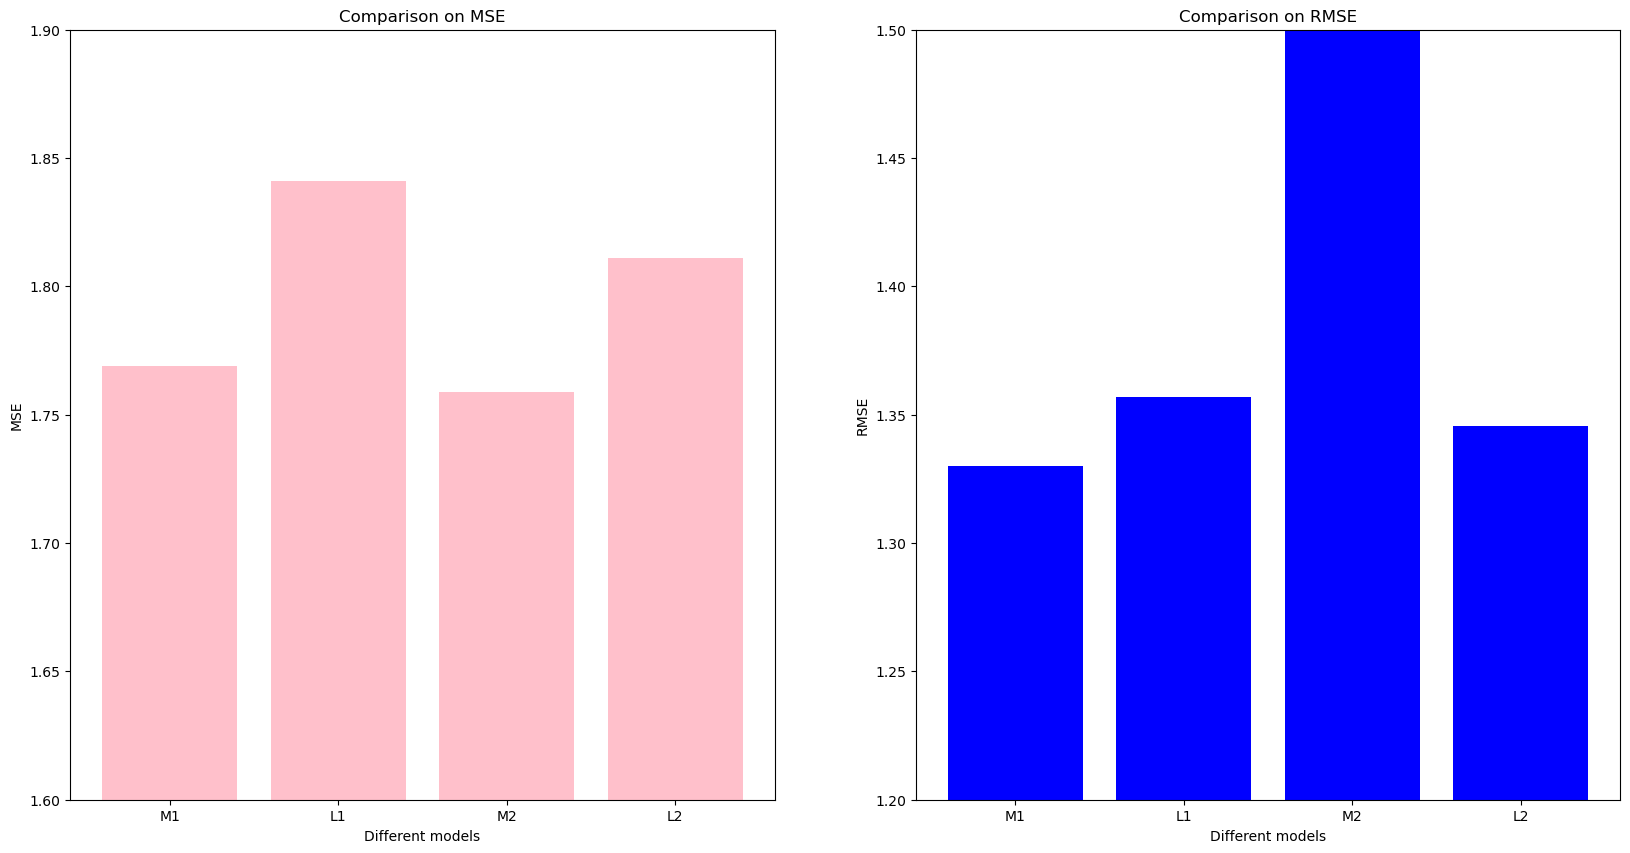

In [62]:

plt.figure(figsize=(20,10))
# subplot 1 MSE
plt.subplot(1,2,1)
plt.ylabel('MSE')
plt.xlabel('Different models')
plt.ylim(1.6,1.9)
plt.title("Comparison on MSE")
plt.bar(data=msedf,x=['M1','L1', 'M2', 'L2'],height='mse', color='pink')
# subplot 2 RMSE
plt.subplot(1,2,2)
plt.ylabel('RMSE')
plt.xlabel('Different models')
plt.ylim(1.2,1.5)
plt.title("Comparison on RMSE")
plt.bar(data=rmsedf,x=['M1','L1', 'M2', 'L2'],height='rmse', color='blue')


In [3]:
# insightful analysis
print('M1 is greater than M2 and L1 is greater than L2 meaning the model with less training data yield has higher MSE ')
print('M1, L1 and L2 have better RMSE while M2 has the highest RSME which is not good')
print('The more corelated columns as input help generate better prediction results. This is proven by M1 being smaller than L1')

M1 is greater than M2 and L1 is greater than L2 meaning the model with less training data yield has higher MSE 
M1, L1 and L2 have better RMSE while M2 has the highest RSME which is not good
The more corelated columns as input help generate better prediction results. This is proven by M1 being smaller than L1
